Logistic Regression Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1301
           1       0.85      0.90      0.88      1244

    accuracy                           0.88      2545
   macro avg       0.88      0.88      0.88      2545
weighted avg       0.88      0.88      0.88      2545



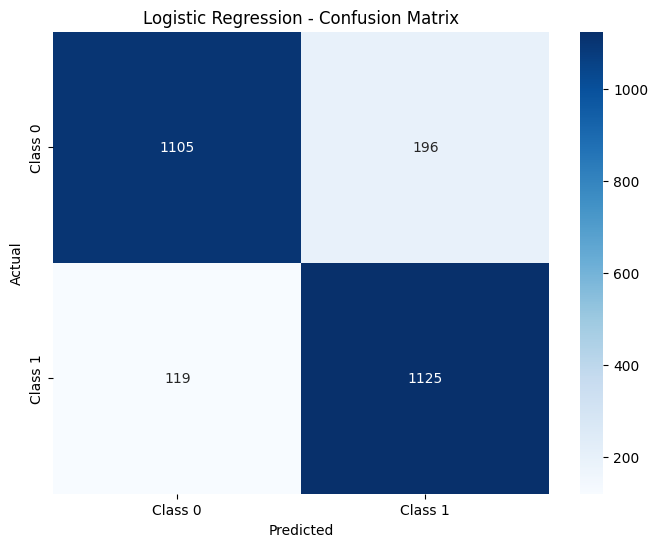

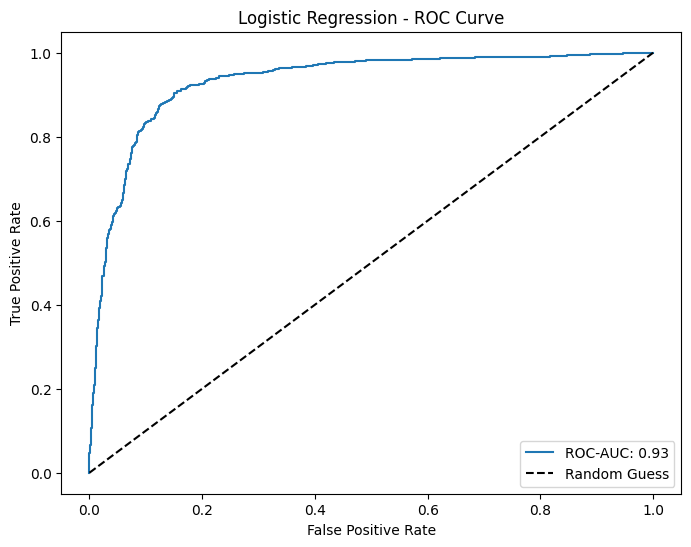

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi yükleme
data = pd.read_csv('data_vectorized.csv')

# Veriyi ayırma (özellikler ve etiketler)
X = data.drop(columns=['Label'])  # Etiket hariç tüm sütunlar
y = data['Label']  # Etiket

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modeli oluşturma ve eğitim
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = log_reg.predict(X_test)

# Doğruluk hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Hesaplama ve Grafik
if len(set(y_test)) == 2:  # İkili sınıflandırma kontrolü
    roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])  # Tahmin olasılıkları
    fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Logistic Regression - ROC Curve")
    plt.legend()
    plt.show()

In [2]:
import joblib

# Logistic Regression modelini kaydetme
joblib.dump(log_reg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']